In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load dataset
df = pd.read_csv('reviews_dataset.csv')

In [4]:
df.head()


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,06-09-2024,Much more accessible for blind users than the ...,Up to this point I’ve mostly been using ChatGP...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,03-07-2025,"Much anticipated, wasn’t let down.",I’ve been a user since it’s initial roll out a...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,"Almost 5 stars, but… no search function",This app would almost be perfect if it wasn’t ...,4,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,"4.5 stars, here’s why","I recently downloaded the app and overall, it'...",4,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,"Good, but Siri support would take it to the ne...",I appreciate the devs implementing Siri suppor...,4,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


In [5]:
# Cleaning Reviews
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from wordcloud import WordCloud

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')



lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_review(text):
    if pd.isna(text):
        return ""
    
    # 1. Fix encoding issues
    text = text.replace("â€™", "'").replace("â€“", "-").replace("â€˜", "'").replace("â€œ", '"').replace("â€", '"')
    
    # 2. Remove line breaks and extra spaces
    text = text.replace("\n", " ").replace("\r", " ")
    text = re.sub(r'\s+', ' ', text)
    
    # 3. Lowercase
    text = text.lower()
    
    # 4. Remove URLs if any
    text = re.sub(r"http\S+|www\S+", "", text)
    
    # 5. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 6. Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # 7. Tokenize
    words = text.split()
    
    # 8. Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 2]
    
    # Join back to string
    return " ".join(words)

# Apply cleaning
df['clean_review'] = df['review'].apply(clean_review)

# Optional: check length
df['review_length_clean'] = df['clean_review'].apply(lambda x: len(x.split()))

# Preview
print(df[['review', 'clean_review', 'review_length_clean']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nasar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nasar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nasar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              review  \
0  Up to this point I’ve mostly been using ChatGP...   
1  I’ve been a user since it’s initial roll out a...   
2  This app would almost be perfect if it wasn’t ...   
3  I recently downloaded the app and overall, it'...   
4  I appreciate the devs implementing Siri suppor...   

                                        clean_review  review_length_clean  
0  point i’ve mostly using chatgpt window desktop...                  132  
1  i’ve user since it’s initial roll waiting mobi...                  138  
2  app would almost perfect wasn’t one little thi...                  137  
3  recently downloaded app overall great platform...                  128  
4  appreciate devs implementing siri support—it a...                  111  


In [6]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,clean_review,review_length_clean
0,06-09-2024,Much more accessible for blind users than the ...,Up to this point I’ve mostly been using ChatGP...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,point i’ve mostly using chatgpt window desktop...,132
1,03-07-2025,"Much anticipated, wasn’t let down.",I’ve been a user since it’s initial roll out a...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,i’ve user since it’s initial roll waiting mobi...,138
2,########,"Almost 5 stars, but… no search function",This app would almost be perfect if it wasn’t ...,4,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,app would almost perfect wasn’t one little thi...,137
3,########,"4.5 stars, here’s why","I recently downloaded the app and overall, it'...",4,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,recently downloaded app overall great platform...,128
4,########,"Good, but Siri support would take it to the ne...",I appreciate the devs implementing Siri suppor...,4,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,appreciate devs implementing siri support—it a...,111


In [7]:
# Fill missing titles first
df['title'] = df['title'].fillna('')

# Clean the title using the same function
df['clean_title'] = df['title'].apply(clean_review)

# Optional: check
print(df[['title', 'clean_title']].head())



                                               title  \
0  Much more accessible for blind users than the ...   
1                 Much anticipated, wasn’t let down.   
2            Almost 5 stars, but… no search function   
3                              4.5 stars, here’s why   
4  Good, but Siri support would take it to the ne...   

                               clean_title  
0   much accessible blind user web version  
1              much anticipated wasn’t let  
2         almost star but… search function  
3                              star here’s  
4  good siri support would take next level  


In [8]:
df['full_text'] = df['clean_title'] + " " + df['clean_review']


In [17]:
df.value_counts('sentiment')

sentiment
Positive    205
Negative     27
Neutral      18
Name: count, dtype: int64

In [10]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,clean_review,review_length_clean,clean_title,full_text
0,06-09-2024,Much more accessible for blind users than the ...,Up to this point I’ve mostly been using ChatGP...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,point i’ve mostly using chatgpt window desktop...,132,much accessible blind user web version,much accessible blind user web version point i...
1,03-07-2025,"Much anticipated, wasn’t let down.",I’ve been a user since it’s initial roll out a...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,i’ve user since it’s initial roll waiting mobi...,138,much anticipated wasn’t let,much anticipated wasn’t let i’ve user since it...
2,########,"Almost 5 stars, but… no search function",This app would almost be perfect if it wasn’t ...,4,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,app would almost perfect wasn’t one little thi...,137,almost star but… search function,almost star but… search function app would alm...
3,########,"4.5 stars, here’s why","I recently downloaded the app and overall, it'...",4,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,recently downloaded app overall great platform...,128,star here’s,star here’s recently downloaded app overall gr...
4,########,"Good, but Siri support would take it to the ne...",I appreciate the devs implementing Siri suppor...,4,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,appreciate devs implementing siri support—it a...,111,good siri support would take next level,good siri support would take next level apprec...


In [11]:
#saving the cleaned data to a new CSV file
df.to_csv('reviews_cleaned.csv', index=False)
df.head()


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,clean_review,review_length_clean,clean_title,full_text
0,06-09-2024,Much more accessible for blind users than the ...,Up to this point I’ve mostly been using ChatGP...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,point i’ve mostly using chatgpt window desktop...,132,much accessible blind user web version,much accessible blind user web version point i...
1,03-07-2025,"Much anticipated, wasn’t let down.",I’ve been a user since it’s initial roll out a...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,i’ve user since it’s initial roll waiting mobi...,138,much anticipated wasn’t let,much anticipated wasn’t let i’ve user since it...
2,########,"Almost 5 stars, but… no search function",This app would almost be perfect if it wasn’t ...,4,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,app would almost perfect wasn’t one little thi...,137,almost star but… search function,almost star but… search function app would alm...
3,########,"4.5 stars, here’s why","I recently downloaded the app and overall, it'...",4,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,recently downloaded app overall great platform...,128,star here’s,star here’s recently downloaded app overall gr...
4,########,"Good, but Siri support would take it to the ne...",I appreciate the devs implementing Siri suppor...,4,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,appreciate devs implementing siri support—it a...,111,good siri support would take next level,good siri support would take next level apprec...


In [12]:
#missing values in the dataset
df.isnull().sum()
#insights: There are no missing values in the dataset after cleaning.

date                   0
title                  0
review                 0
rating                 0
username               0
helpful_votes          0
review_length          0
platform               0
language               0
location               0
version                0
verified_purchase      0
clean_review           0
review_length_clean    0
clean_title            0
full_text              0
dtype: int64

In [13]:
# Example: 1-2 → negative, 3 → neutral, 4-5 → positive
def label_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['rating'].apply(label_sentiment)


In [13]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,clean_review,review_length_clean,clean_title,full_text,sentiment
0,06-09-2024,Much more accessible for blind users than the ...,Up to this point I’ve mostly been using ChatGP...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,point i’ve mostly using chatgpt window desktop...,132,much accessible blind user web version,much accessible blind user web version point i...,positive
1,03-07-2025,"Much anticipated, wasn’t let down.",I’ve been a user since it’s initial roll out a...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,i’ve user since it’s initial roll waiting mobi...,138,much anticipated wasn’t let,much anticipated wasn’t let i’ve user since it...,positive
2,########,"Almost 5 stars, but… no search function",This app would almost be perfect if it wasn’t ...,4,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,app would almost perfect wasn’t one little thi...,137,almost star but… search function,almost star but… search function app would alm...,positive
3,########,"4.5 stars, here’s why","I recently downloaded the app and overall, it'...",4,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,recently downloaded app overall great platform...,128,star here’s,star here’s recently downloaded app overall gr...,positive
4,########,"Good, but Siri support would take it to the ne...",I appreciate the devs implementing Siri suppor...,4,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,appreciate devs implementing siri support—it a...,111,good siri support would take next level,good siri support would take next level apprec...,positive


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 250 non-null    object
 1   title                250 non-null    object
 2   review               250 non-null    object
 3   rating               250 non-null    int64 
 4   username             250 non-null    object
 5   helpful_votes        250 non-null    int64 
 6   review_length        250 non-null    int64 
 7   platform             250 non-null    object
 8   language             250 non-null    object
 9   location             250 non-null    object
 10  version              250 non-null    object
 11  verified_purchase    250 non-null    object
 12  clean_review         250 non-null    object
 13  review_length_clean  250 non-null    int64 
 14  clean_title          250 non-null    object
 15  full_text            250 non-null    object
 16  sentimen

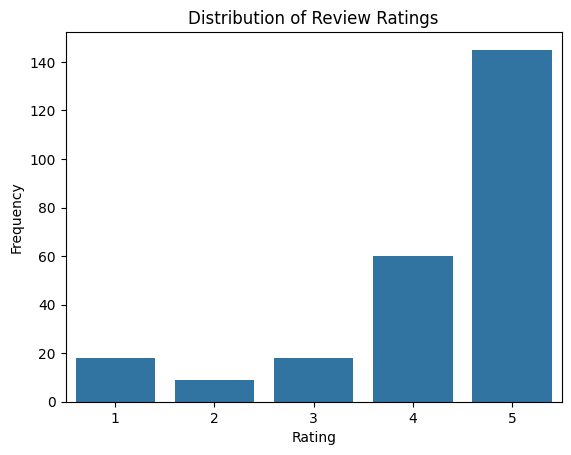

In [15]:
# Distribution of review ratings
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='rating', data=df)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

C:\Users\Nasar\AppData\Local\Temp\ipykernel_1064\1068581098.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


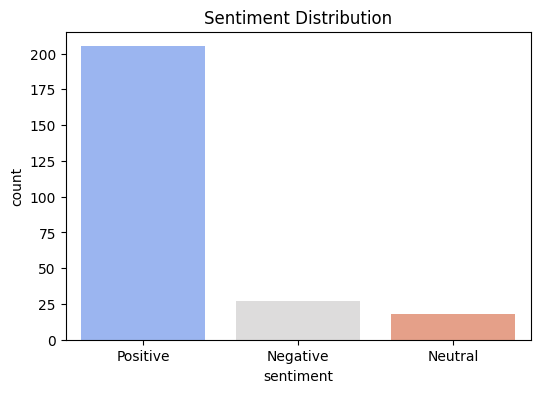

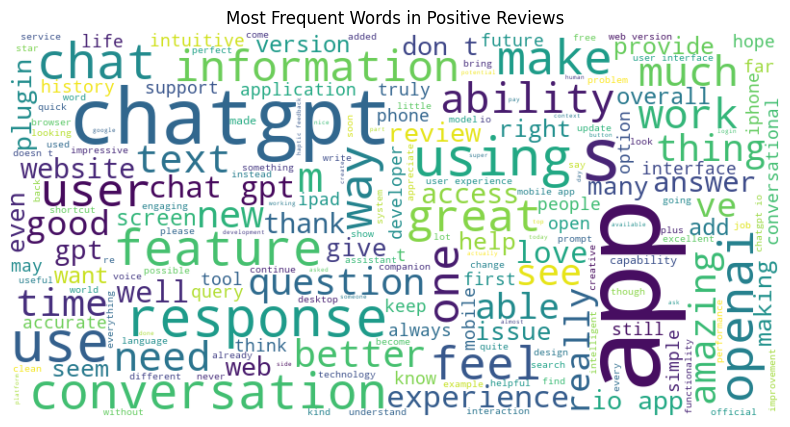

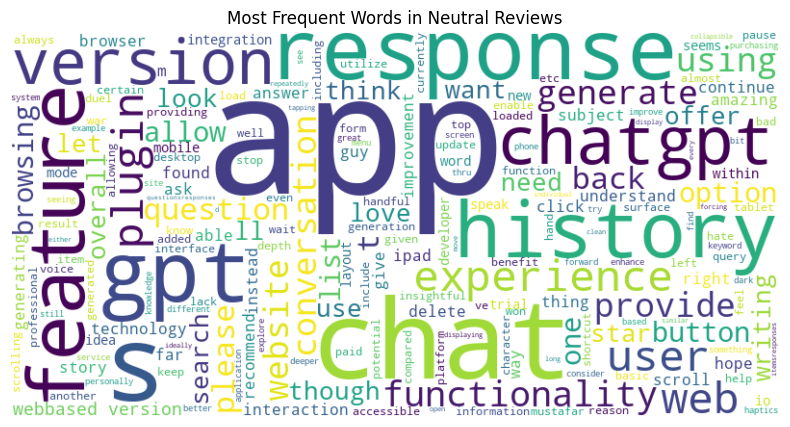

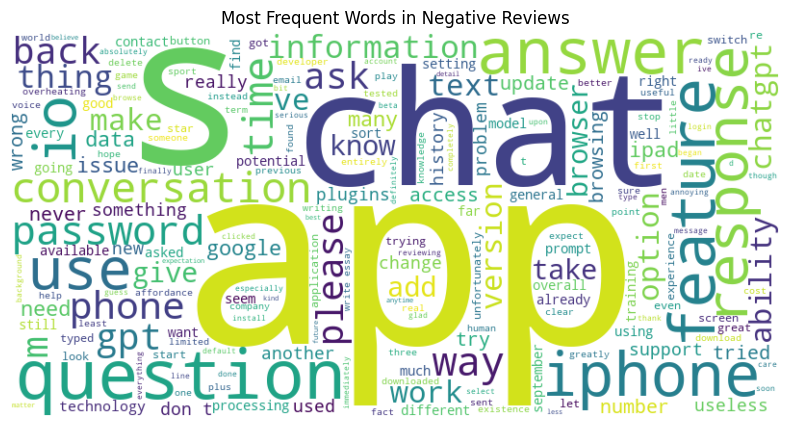

In [16]:
# ==================================================
# 3️⃣ Exploratory Data Analysis (EDA)
# ==================================================
def label_sentiment(r):
    if r <= 2:
        return 'Negative'
    elif r == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiment'] = df['rating'].apply(label_sentiment)

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()

for s in ['Positive', 'Neutral', 'Negative']:
    text = " ".join(df[df['sentiment']==s]['clean_review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Frequent Words in {s} Reviews')
    plt.show()

C:\Users\Nasar\AppData\Local\Temp\ipykernel_1064\1604178827.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='coolwarm')


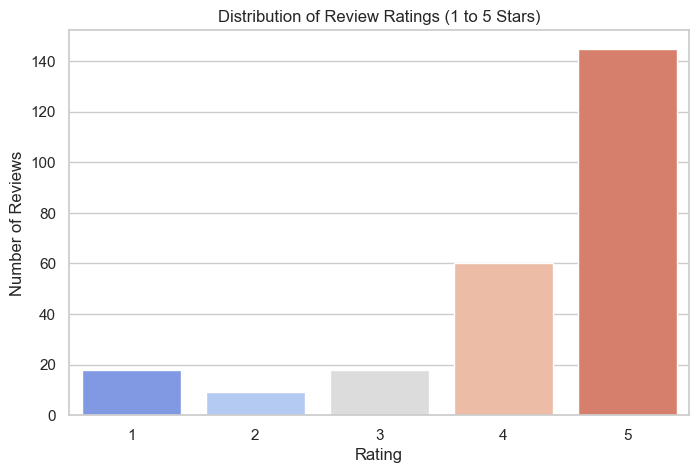

In [18]:
# Set up visualization style
sns.set(style="whitegrid", palette="muted")

# 1️⃣ Distribution of Review Ratings
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=df, palette='coolwarm')
plt.title('Distribution of Review Ratings (1 to 5 Stars)')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

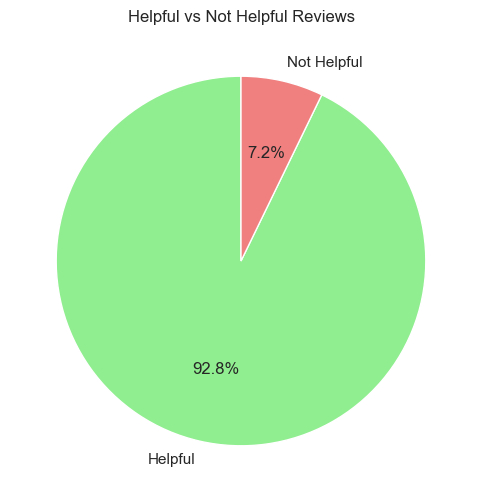

In [19]:
# 2️⃣ Helpful Reviews Count (Threshold > 10)
if 'helpful_votes' in df.columns:
    df['helpful'] = df['helpful_votes'].apply(lambda x: 'Helpful' if x > 10 else 'Not Helpful')
    helpful_counts = df['helpful'].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(helpful_counts, labels=helpful_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen','lightcoral'])
    plt.title('Helpful vs Not Helpful Reviews')
    plt.show()


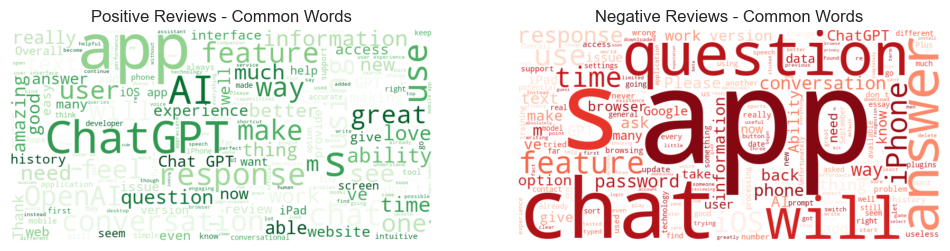

In [20]:
# 3️⃣ Common Keywords in Positive vs Negative Reviews
positive_text = " ".join(df[df['rating'] >= 4]['review'])
negative_text = " ".join(df[df['rating'] <= 2]['review'])

pos_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
neg_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(pos_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews - Common Words')

plt.subplot(1,2,2)
plt.imshow(neg_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews - Common Words')
plt.show()

C:\Users\Nasar\AppData\Local\Temp\ipykernel_1064\2261561752.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rating_over_time = df.groupby(pd.Grouper(key='date', freq='M'))['rating'].mean().reset_index()


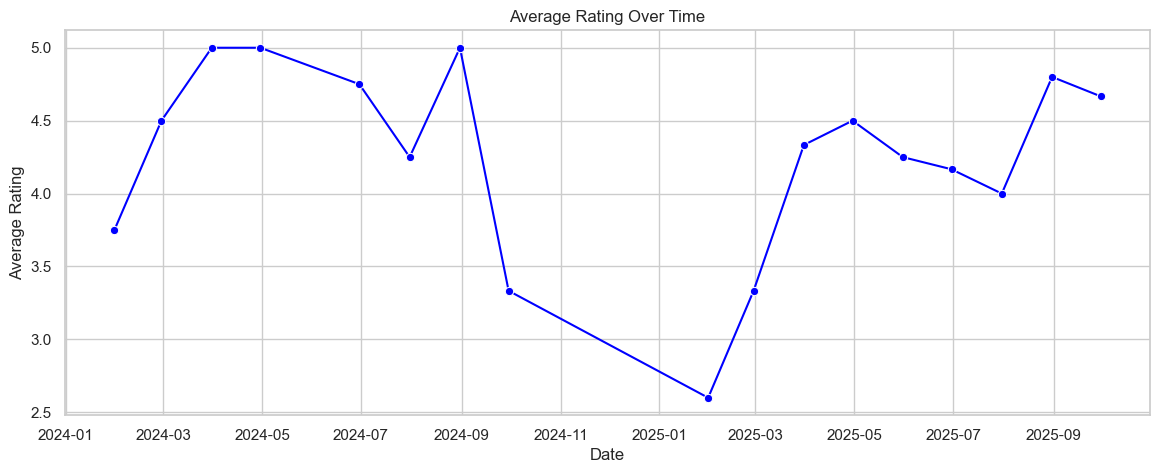

In [21]:
# 4️⃣ Average Rating Over Time
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    rating_over_time = df.groupby(pd.Grouper(key='date', freq='M'))['rating'].mean().reset_index()
    plt.figure(figsize=(14,5))
    sns.lineplot(x='date', y='rating', data=rating_over_time, marker='o', color='blue')
    plt.title('Average Rating Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Rating')
    plt.show()

C:\Users\Nasar\AppData\Local\Temp\ipykernel_1064\3147484671.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location', y='rating', data=loc_data, estimator='mean', palette='viridis')


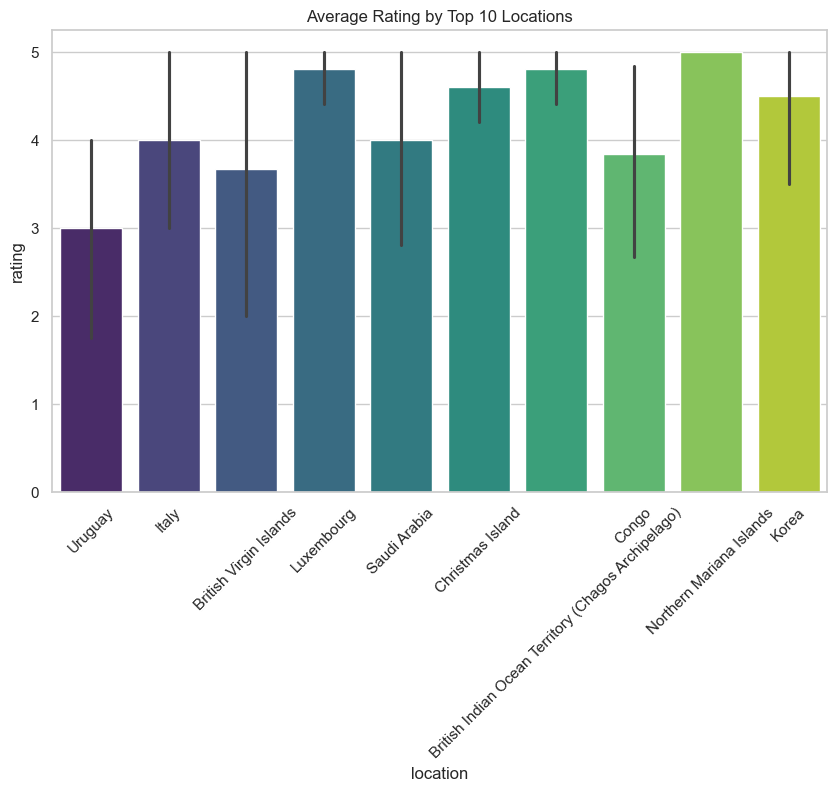

In [22]:
# 5️⃣ Ratings by User Location
if 'location' in df.columns:
    top_locations = df['location'].value_counts().head(10).index
    loc_data = df[df['location'].isin(top_locations)]
    plt.figure(figsize=(10,6))
    sns.barplot(x='location', y='rating', data=loc_data, estimator='mean', palette='viridis')
    plt.title('Average Rating by Top 10 Locations')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\Nasar\AppData\Local\Temp\ipykernel_1064\544878662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='rating', data=df, estimator='mean', palette='coolwarm')


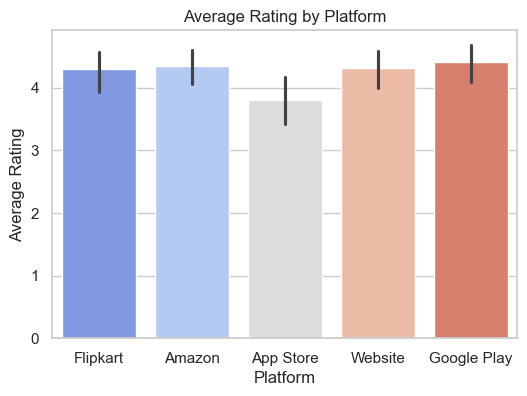

In [ ]:
# 6️⃣ Ratings by Platform
if 'platform' in df.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x='platform', y='rating', data=df, estimator='mean', palette='coolwarm')
    plt.title('Average Rating by Platform')
    plt.xlabel('Platform')
    plt.ylabel('Average Rating')
    plt.show()

C:\Users\Nasar\AppData\Local\Temp\ipykernel_1064\4288971347.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='verified_purchase', y='rating', data=df, estimator='mean', palette='Set2')


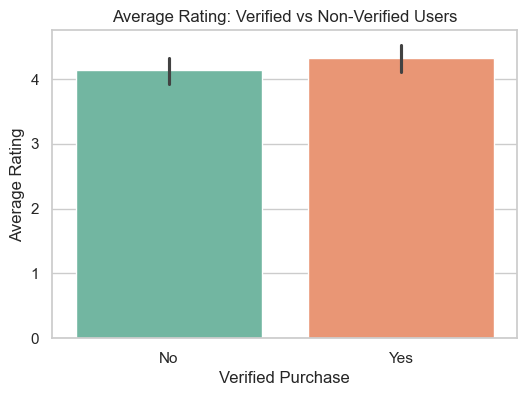

In [24]:
# 7️⃣ Verified vs Non-Verified Users
if 'verified_purchase' in df.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x='verified_purchase', y='rating', data=df, estimator='mean', palette='Set2')
    plt.title('Average Rating: Verified vs Non-Verified Users')
    plt.xlabel('Verified Purchase')
    plt.ylabel('Average Rating')
    plt.show()

C:\Users\Nasar\AppData\Local\Temp\ipykernel_1064\846029528.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='review_length', data=df, palette='Blues')


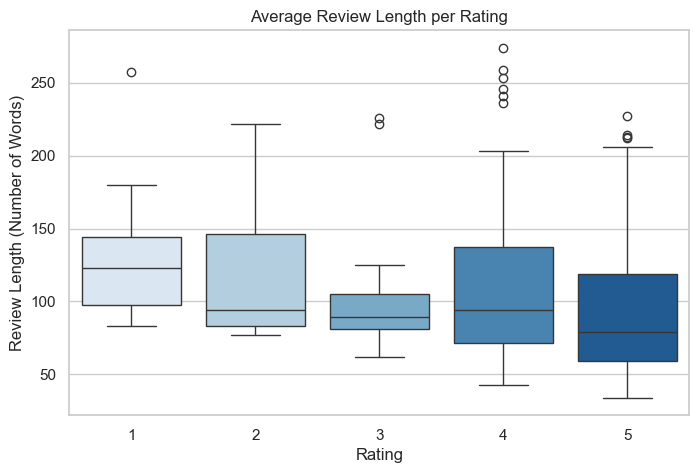

In [25]:
# 8️⃣ Average Review Length per Rating
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,5))
sns.boxplot(x='rating', y='review_length', data=df, palette='Blues')
plt.title('Average Review Length per Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (Number of Words)')
plt.show()


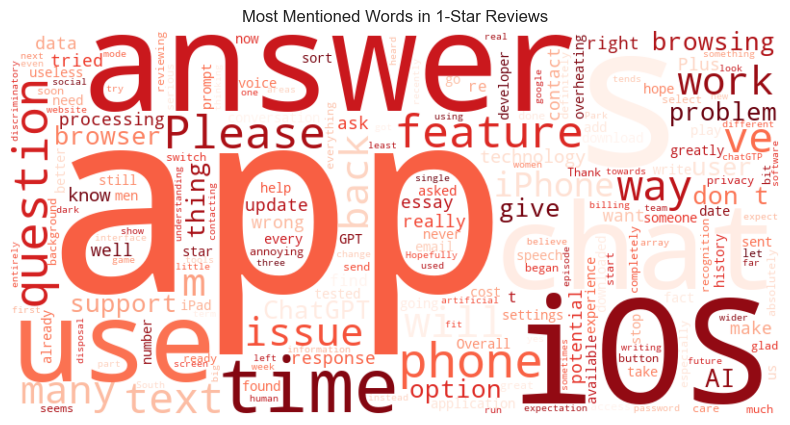

In [26]:
# 9️⃣ Most Mentioned Words in 1-Star Reviews
one_star_text = " ".join(df[df['rating'] == 1]['review'])
one_star_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(one_star_text)
plt.figure(figsize=(10,5))
plt.imshow(one_star_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Mentioned Words in 1-Star Reviews')
plt.show()

C:\Users\Nasar\AppData\Local\Temp\ipykernel_1064\165468511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='version', y='rating', data=df, estimator='mean', palette="Blues_d")


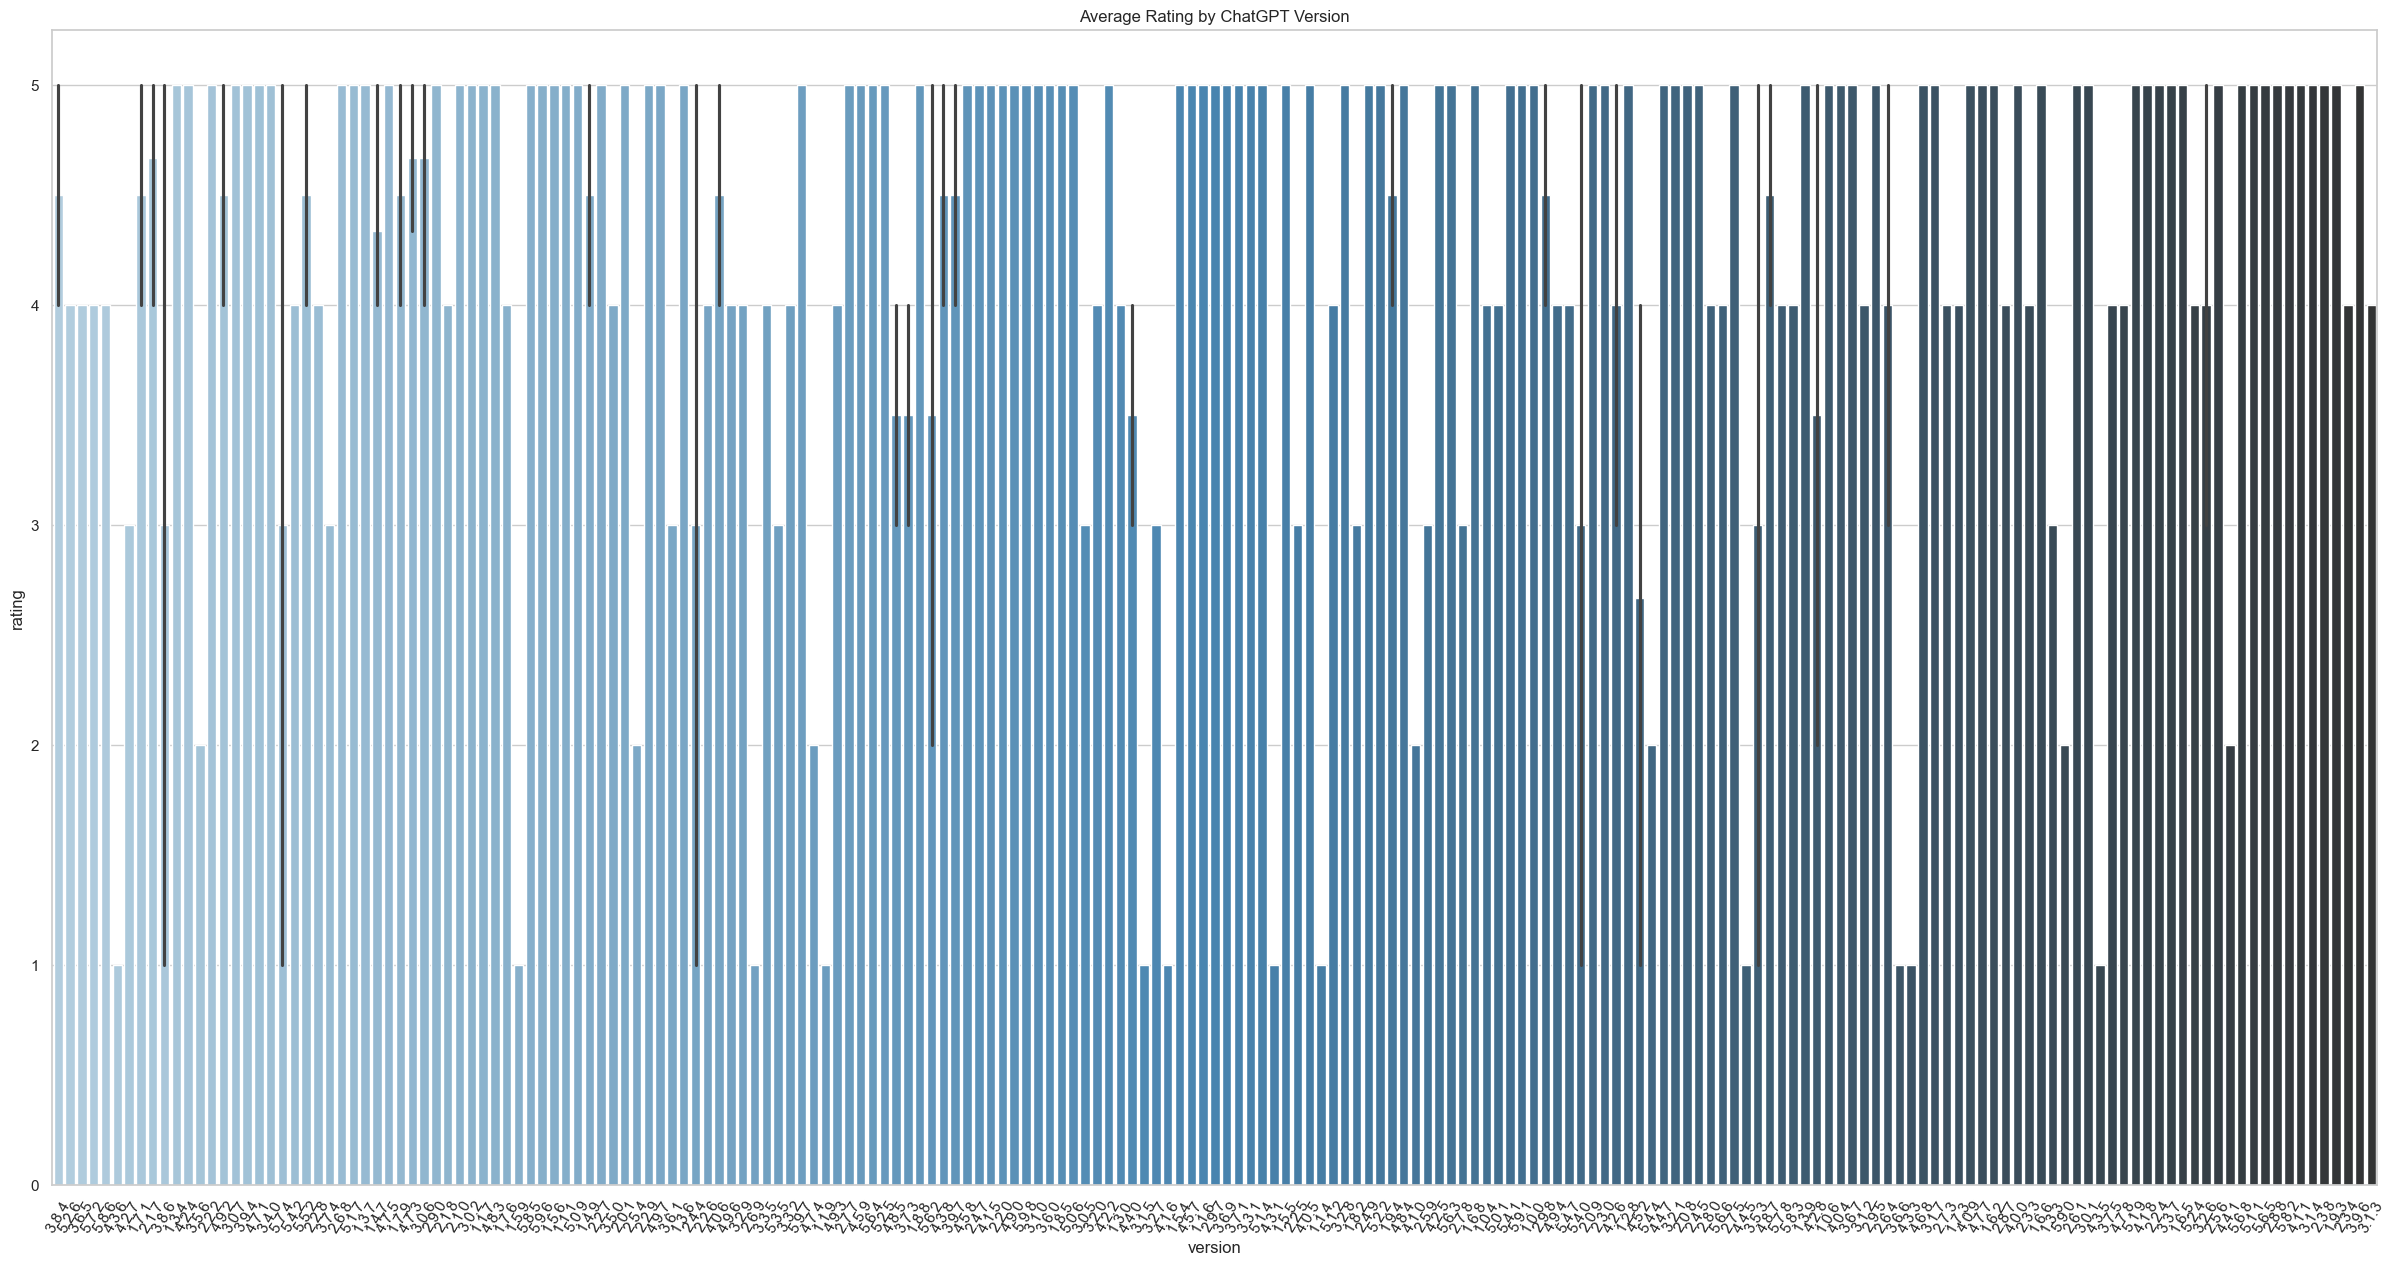

In [27]:
# 10. Average rating by ChatGPT version
plt.figure(figsize=(30,15))
sns.barplot(x='version', y='rating', data=df, estimator='mean', palette="Blues_d")
plt.title("Average Rating by ChatGPT Version")
plt.xticks(rotation=60)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

X = df['full_text']  # Using combined text
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [30]:
from imblearn.over_sampling import SMOTE

# Find the smallest class size in y_train
min_class_size = y_train.value_counts().min()

# Set k_neighbors to min_class_size - 1 (must be >= 1)
k_neighbors = max(1, min_class_size - 1)

smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_vec_res, y_train_res = smote.fit_resample(X_train_vec, y_train)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_vec_res, y_train_res)

# Predictions
y_pred = model.predict(X_test_vec)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         8
     Neutral       0.00      0.00      0.00         5
    Positive       0.82      0.97      0.89        62

    accuracy                           0.80        75
   macro avg       0.27      0.32      0.30        75
weighted avg       0.68      0.80      0.73        75

[[ 0  0  8]
 [ 0  0  5]
 [ 2  0 60]]


f:\Nasar\Projects\nlp\nlpenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
f:\Nasar\Projects\nlp\nlpenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
f:\Nasar\Projects\nlp\nlpenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [32]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X_train_vec_res, y_train_res, cv=cv, scoring='f1_macro')
print("F1 Macro CV Scores:", scores)
print("Mean F1:", scores.mean())

F1 Macro CV Scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0


In [33]:
#RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_scores = cross_val_score(rf_model, X_train_vec_res, y_train_res, cv=5, scoring='f1_macro')

print("Random Forest CV F1 Macro:", rf_scores)
print("Mean F1:", rf_scores.mean())

Random Forest CV F1 Macro: [0.98850233 1.         1.         1.         1.        ]
Mean F1: 0.9977004658539002


In [34]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
rf_model.fit(X_train_vec_res, y_train_res)
y_pred_rf = rf_model.predict(X_test_vec)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         8
     Neutral       0.00      0.00      0.00         5
    Positive       0.83      1.00      0.91        62

    accuracy                           0.83        75
   macro avg       0.28      0.33      0.30        75
weighted avg       0.68      0.83      0.75        75



f:\Nasar\Projects\nlp\nlpenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
f:\Nasar\Projects\nlp\nlpenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
f:\Nasar\Projects\nlp\nlpenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec_res, y_train_res)

# Predictions
y_pred_nb = nb_model.predict(X_test_vec)

# Evaluation
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.30      0.38      0.33         8
     Neutral       0.25      0.40      0.31         5
    Positive       0.89      0.82      0.86        62

    accuracy                           0.75        75
   macro avg       0.48      0.53      0.50        75
weighted avg       0.79      0.75      0.76        75

Confusion Matrix:
[[ 3  2  3]
 [ 0  2  3]
 [ 7  4 51]]


In [36]:
# Cross-validation for Naive Bayes
from sklearn.model_selection import cross_val_score
nb_scores = cross_val_score(nb_model, X_train_vec_res, y_train_res, cv=5, scoring='f1_weighted')
print("Naive Bayes Cross-Validation F1 Weighted Scores:", nb_scores)
print("Mean F1 Score:", nb_scores.mean())
print("Std Deviation:", nb_scores.std())

Naive Bayes Cross-Validation F1 Weighted Scores: [0.89272457 0.91542688 0.87629842 0.88945719 0.92768697]
Mean F1 Score: 0.9003188053385636
Std Deviation: 0.018600519138491724



Naive Bayes Stratified K-Fold CV F1 Weighted Scores: [0.9403925053857005, 0.9163910438716489, 0.8355817810173937, 0.9028827519379846, 0.9145676631308262]
Mean F1 Score: 0.9019631490687108
Std Deviation: 0.035358690710846394

Combined Classification Report after CV:
              precision    recall  f1-score   support

    Negative       0.93      1.00      0.96       143
     Neutral       0.83      1.00      0.91       143
    Positive       1.00      0.72      0.84       143

    accuracy                           0.91       429
   macro avg       0.92      0.91      0.90       429
weighted avg       0.92      0.91      0.90       429

Combined Confusion Matrix after CV:
[[143   0   0]
 [  0 143   0]
 [ 11  29 103]]
ROC AUC Score (Positive vs Rest): nan


f:\Nasar\Projects\nlp\nlpenv\Lib\site-packages\sklearn\metrics\_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
f:\Nasar\Projects\nlp\nlpenv\Lib\site-packages\sklearn\metrics\_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
f:\Nasar\Projects\nlp\nlpenv\Lib\site-packages\sklearn\metrics\_ranking.py:1046: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
f:\Nasar\Projects\nlp\nlpenv\Lib\site-packages\sklearn\metrics\_ranking.py:1046: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
f:\Nasar\Projects\nlp\nlpenv\Lib\site-packages\sklearn\metrics\_ranking.py:1046: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

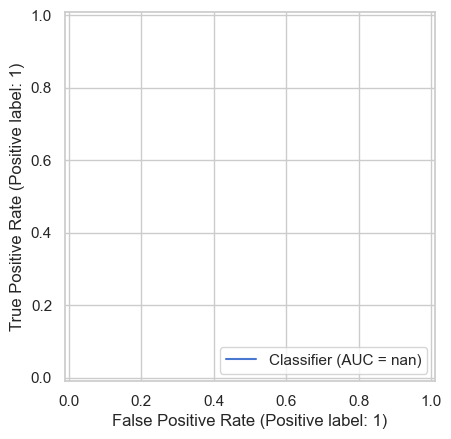

<Figure size 640x480 with 0 Axes>

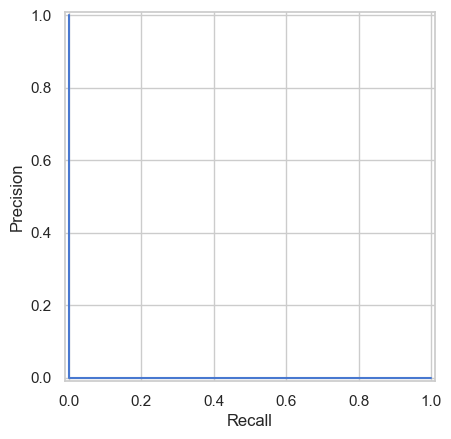

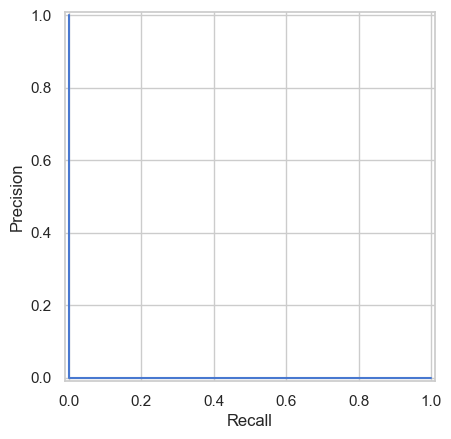

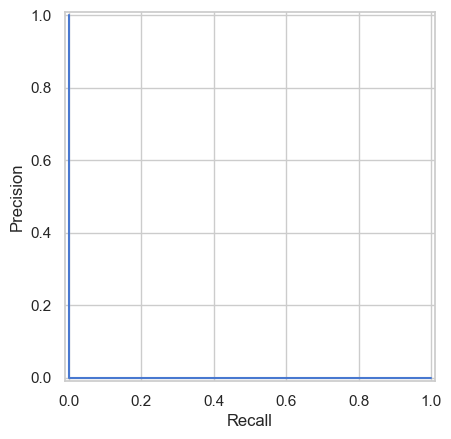

In [37]:
from sklearn.metrics import f1_score
import numpy as np
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_true_all = []
y_pred_all = []
nb_scores = []

for train_idx, val_idx in cv.split(X_train_vec_res, y_train_res):
    X_train_fold, X_val_fold = X_train_vec_res[train_idx], X_train_vec_res[val_idx]
    y_train_fold, y_val_fold = y_train_res[train_idx], y_train_res[val_idx]
    
    nb_model_fold = MultinomialNB()
    nb_model_fold.fit(X_train_fold, y_train_fold)
    
    y_pred_fold = nb_model_fold.predict(X_val_fold)
    
    y_true_all.extend(y_val_fold)
    y_pred_all.extend(y_pred_fold)
    
    
    f1_fold = f1_score(y_val_fold, y_pred_fold, average='weighted')
    nb_scores.append(f1_fold)

# Combined metrics across all folds
print("\nNaive Bayes Stratified K-Fold CV F1 Weighted Scores:", nb_scores)
print("Mean F1 Score:", np.mean(nb_scores))
print("Std Deviation:", np.std(nb_scores))

print("\nCombined Classification Report after CV:")
print(classification_report(y_true_all, y_pred_all))

print("Combined Confusion Matrix after CV:")
print(confusion_matrix(y_true_all, y_pred_all))
#ROC AUC graph for multiclass
from sklearn.metrics import roc_auc_score
y_true_bin = [1 if label == 'positive' else 0 for label in y_true_all]
y_pred_bin = [1 if label == 'positive' else 0 for label in y_pred_all]
roc_auc = roc_auc_score(y_true_bin, y_pred_bin)
print("ROC AUC Score (Positive vs Rest):", roc_auc)
import matplotlib.pyplot as plt
plt.figure()
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_true_bin, y_pred_bin)

# Precision vs Recall graph for multiclass
from sklearn.metrics import precision_recall_curve  
import numpy as np
from sklearn.preprocessing import label_binarize
y_true_bin = label_binarize(y_true_all, classes=['negative', 'neutral', 'positive'])
y_pred_bin = label_binarize(y_pred_all, classes=['negative', 'neutral', 'positive'])
n_classes = y_true_bin.shape[1] 
precision = dict()
recall = dict()
print
from sklearn.metrics import PrecisionRecallDisplay
plt.figure()    
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_pred_bin[:, i])
    disp = PrecisionRecallDisplay(precision=precision[i], recall=recall[i])
    disp.plot()


In [38]:
import joblib
joblib.dump(nb_model_fold, "best_sentiment_model.pkl")
print("✅ Model saved as best_sentiment_model.pkl")

✅ Model saved as best_sentiment_model.pkl


In [39]:
joblib.dump(vectorizer, "best_sentiment_vectorizer.pkl")
print("✅ Vectorizer saved as best_sentiment_vectorizer.pkl")   

✅ Vectorizer saved as best_sentiment_vectorizer.pkl
